<a href="https://colab.research.google.com/github/Satvik256/TestRepo/blob/master/sgd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline
from fastai.basics import *

In [2]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
n=100

In [4]:
x=torch.ones(n,2)
x

tensor([[1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1

In [5]:
x[:,0].uniform_(-1.0,1.0)

tensor([ 0.2884, -0.8980,  0.0504, -0.3797,  0.4836,  0.9480,  0.7461,  0.3171,
         0.7528, -0.6748,  0.9724, -0.8447, -0.6090,  0.2036,  0.0777,  0.7197,
         0.5511,  0.9173,  0.3962, -0.3229, -0.5638,  0.5950,  0.3956, -0.8212,
        -0.9741, -0.5292, -0.4452, -0.0269, -0.2122,  0.6963, -0.6896,  0.8433,
         0.6976, -0.6349, -0.0238, -0.7832,  0.3230, -0.2184,  0.0529, -0.7748,
        -0.1876,  0.0335, -0.7517, -0.4794, -0.8579,  0.2729,  0.7058, -0.7044,
         0.3697, -0.9561, -0.7827, -0.6726, -0.6248,  0.0326,  0.5285, -0.7876,
         0.8064, -0.4186, -0.7957,  0.1772, -0.0223, -0.2668, -0.4469,  0.9498,
        -0.1181, -0.0585, -0.5728,  0.8822,  0.3932,  0.5877, -0.9727, -0.9592,
         0.3084,  0.8952,  0.8640,  0.6539,  0.2218,  0.8569,  0.1894,  0.5576,
        -0.8062, -0.5589,  0.3078, -0.8935, -0.1866, -0.9367, -0.0261, -0.4846,
         0.5061, -0.3856,  0.5338,  0.6094, -0.7788, -0.1177, -0.0934,  0.9212,
        -0.6373,  0.0468, -0.3101,  0.51

In [6]:
x[:5]

tensor([[ 0.2884,  1.0000],
        [-0.8980,  1.0000],
        [ 0.0504,  1.0000],
        [-0.3797,  1.0000],
        [ 0.4836,  1.0000]])

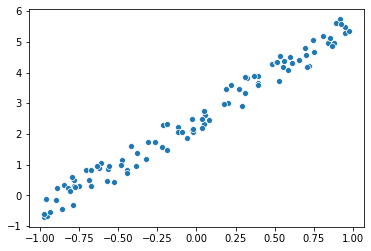

In [7]:
a=tensor(3.0,2.0)
y=x@a+torch.rand(n)
sns.scatterplot(x=x[:,0],y=y)

In [0]:
def mse(y_pred,y): return ((y_pred-y)**2).mean()

In [0]:
a_pred=tensor(-1.,1)

In [0]:
y_pred=x@a_pred

In [11]:
mse(y_pred,y)

tensor(7.8841)

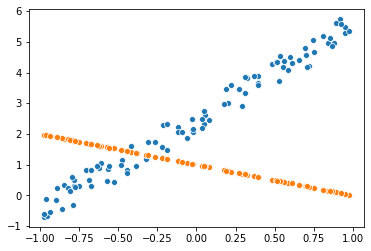

In [12]:
sns.scatterplot(x=x[:,0],y=y)
sns.scatterplot(x=x[:,0],y=y_pred)

In [13]:
a_pred=nn.Parameter(a);a_pred

Parameter containing:
tensor([3., 2.], requires_grad=True)

In [0]:
def update():
  y_hat=x@a_pred
  loss=mse(y_hat,y)
  if(t%5==0 or t==0):print(loss)
  loss.backward()
  with torch.no_grad():
    a_pred.sub_(lr*a_pred.grad)
    a_pred.grad.zero_()

In [15]:
lr=0.5
for t in range(50): update()

tensor(0.3570, grad_fn=<MeanBackward0>)
tensor(0.0794, grad_fn=<MeanBackward0>)
tensor(0.0794, grad_fn=<MeanBackward0>)
tensor(0.0794, grad_fn=<MeanBackward0>)
tensor(0.0794, grad_fn=<MeanBackward0>)
tensor(0.0794, grad_fn=<MeanBackward0>)
tensor(0.0794, grad_fn=<MeanBackward0>)
tensor(0.0794, grad_fn=<MeanBackward0>)
tensor(0.0794, grad_fn=<MeanBackward0>)
tensor(0.0794, grad_fn=<MeanBackward0>)


In [0]:
y_pred=x@a_pred

In [0]:
y_pred=y_pred.detach().numpy()

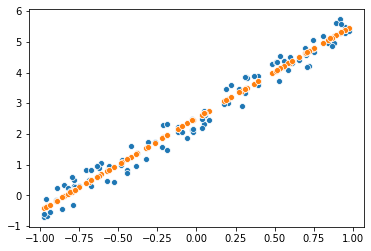

In [18]:
sns.scatterplot(x=x[:,0],y=y)
sns.scatterplot(x=x[:,0],y=y_pred)

In [0]:
from matplotlib import animation, rc
rc('animation', html='jshtml')

In [20]:
a_pred = nn.Parameter(tensor(-1.,1))

fig = plt.figure()
plt.scatter(x[:,0], y, c='orange')
y_pred=x@a_pred
line, = plt.plot(x[:,0], y_pred.detach().numpy())
plt.close()

def animate(i):
    update()
    y_pred=x@a_pred
    line.set_ydata(y_pred.detach().numpy())
    return line,

animation.FuncAnimation(fig, animate, np.arange(0, 100), interval=20)